Sınıf dengesizliğine sahip kalp krizi riski'ne ilişkin veri kümesini kullanarak:

Lojistik Regresyon modeli oluşturup modelinizin performansını ölçün,
Değişik yöntemler ve sınıf oranlarını deneyerek, sınıf dengesizliğinin üstesinden gelin ve performansı en yüksek yöntemi ve sınıflar arası oranı belirleyin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
import warnings; warnings.filterwarnings("ignore")
df = pd.read_csv("heart.csv")
df.isnull().sum()*100/df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,negative
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,negative
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,negative
3,56,1,2,120,236,0,0,178,0,0.8,1,0,3,negative
4,57,0,4,120,354,0,0,163,1,0.6,1,0,3,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,64,1,4,145,212,0,2,132,0,2.0,2,2,6,positive
173,38,1,1,120,231,0,0,182,1,3.8,2,0,7,positive
174,61,1,4,138,166,0,2,125,1,3.6,2,1,3,positive
175,58,1,4,114,318,0,1,140,0,4.4,3,3,6,positive


In [3]:
df.ca = df.ca.replace("<null>", 0)
df.thal = df.thal.replace("<null>", 3)
df.target = df.target.replace("negative", 0)
df.target = df.target.replace("positive", 1)

df.ca = df.ca.astype("int64")
df.thal = df.thal.astype("int64")
df.target = df.target.astype("int64")

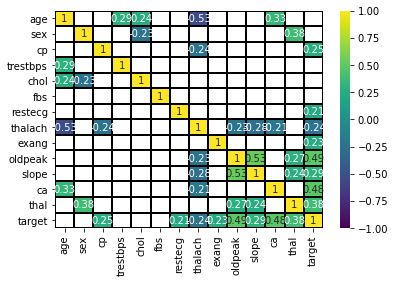

In [4]:
cor_data = df.corr()
sns.heatmap(cor_data[abs(cor_data)>0.2], annot=True, linecolor="black",
            linewidths=0.1, vmin=-1, vmax=1, cmap="viridis")
plt.show()

In [5]:
# Bağımlı değişkenimizin dağılımı
sifir_yuzdelik = df.target.value_counts()[0]/len(df.target)
print(f"0 olan değerlerin yüzdesi: %{(100*sifir_yuzdelik):.2f}")
print(f"1 olan değerlerin yüzdesi: %{(100*(1-sifir_yuzdelik)):.2f}")
del sifir_yuzdelik

0 olan değerlerin yüzdesi: %92.66
1 olan değerlerin yüzdesi: %7.34


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [8]:
X = df.drop('target', axis=1)
y = df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9166666666666666
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



## Örneklem Arttırmak

In [9]:
from sklearn.utils import resample


In [10]:
saglikli = df[df.target == 0]
hasta = df[df.target == 1]

hasta_artırılmış = resample(hasta,
                                     replace = True,
                                     n_samples = len(saglikli),
                                     random_state = 111)

artırılmıs_df = pd.concat([saglikli, hasta_artırılmış])
artırılmıs_df.target.value_counts()

0    164
1    164
Name: target, dtype: int64

In [11]:
X = artırılmıs_df.drop('target', axis=1)
y = artırılmıs_df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9696969696969697
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



## Örneklem Azaltmak

In [12]:
saglikli = df[df.target == 0]
hasta = df[df.target == 1]

hasta_azaltılmış = resample(saglikli,
                                     replace = True,
                                     n_samples = len(hasta),
                                     random_state = 111)

azaltılmış_df = pd.concat([hasta, hasta_azaltılmış])
azaltılmış_df.target.value_counts()

0    13
1    13
Name: target, dtype: int64

In [13]:
X = artırılmıs_df.drop('target', axis=1)
y = artırılmıs_df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9696969696969697
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



## SMOTE

In [14]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
X = df.drop('target', axis=1)
y = df['target']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
model_olustur(X, y)



Modelin doğruluk değeri :  0.9090909090909091
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       131
           1       0.93      0.98      0.96       131

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262

Test veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.86      0.97      0.91        33

    accuracy                           0.91        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.92      0.91      0.91        66



In [15]:
y = df.target
X = df.drop('target', axis=1)


oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
model_olustur(X, y)



Modelin doğruluk değeri :  0.9090909090909091
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       131
           1       0.94      0.98      0.96       132

    accuracy                           0.96       263
   macro avg       0.96      0.96      0.96       263
weighted avg       0.96      0.96      0.96       263

Test veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.86      0.97      0.91        33

    accuracy                           0.91        66
   macro avg       0.92      0.91      0.91        66
weighted avg       0.92      0.91      0.91        66



Genelde smoot ve adasynda verim daha yüksek olur fakat burada birbirlerine çok yakın çıktı.